# ASTR596, FDS: Homework set 3 - Moving from MLE and Frequentism to evaluating the Posterior distribution and Bayesian Statistics



## Problem 1

Last week you showed that Bayesian and Frequentist approaches are often equivalent for simple problems (after all you implicitly had a prior in the form of a grid). 

But it is also true that they can diverge greatly. In practice, this divergence makes itself most clear in two different situations:

1. The handling of "nuisance parameters"
2. The subtle (and often overlooked) difference between frequentist confidence intervals and Bayesian credible intervals

Here, we focus on the first point: the difference between frequentist and Bayesian treatment of nuisance parameters.


## What is a Nuisance Parameter?

***A nuisance parameter is any quantity whose value is not relevant to the goal of an analysis, but is nevertheless required to determine some quantity of interest***.

For example, last week, in problem 3, we estimated both the mean $C$ and shape $\sigma_\text{source}$ for some spherical cow galaxy. Now the shape might be important, but in homework 1, you only needed the brightness of the sources where you plotted up $r$ vs $g-i$ for galaxies (you needed the shape to separate stars from galaxies in the form of MEAN_OBJECT_TYPE, but that's it).

As far as you were concerned in homework 1, the shape was a **nuisance** parameter.


## A Classic Problem:


We'll start with an example of nuisance parameters that, in one form or another, dates all the way back to the posthumous [1763 paper](http://www.stat.ucla.edu/history/essay.pdf) written by Thomas Bayes himself. The particular version of this problem we'll study is borrowed from [Eddy 2004](ftp://selab.janelia.org/pub/publications/Eddy-ATG3/Eddy-ATG3-reprint.pdf).

The setting is a rather contrived game in which Alice and Bob bet on the outcome of a process they can't directly observe:

> Alice and Bob enter a room. Behind a curtain there is a billiard table, which they cannot see, but their friend Carol can. Carol rolls a ball down the table, and marks where it lands. Once this mark is in place, Carol begins rolling new balls down the table. If the ball lands to the left of the mark, Alice gets a point; if it lands to the right of the mark, Bob gets a point.  We can assume for the sake of example that Carol's rolls are unbiased: that is, the balls have an equal chance of ending up anywhere on the table.  **The first person to reach six points wins the game.**

Here ***the location of the mark (determined by the first roll) can be considered a nuisance parameter***.

It is unknown, and not of immediate interest, but it clearly must be accounted for when predicting the outcome of subsequent rolls. If the first roll settles far to the right, then subsequent rolls will favor Alice. If it settles far to the left, Bob will be favored instead.

Given this setup, here is the question we ask of ourselves:

> In a particular game, after eight rolls, Alice has five points and Bob has three points. What is the probability that Bob will go on to win the game?

Intuitively, you probably realize that because Alice received five of the eight points, the marker placement likely favors her. And given this, it's more likely that the next roll will go her way as well. 

And she has three opportunities to get a favorable roll before Bob can win; she seems to have clinched it.  But, **quantitatively**, what is the probability that Bob will squeak-out a win?


Someone following a classical frequentist approach might reason as follows:

To determine the result, we need an intermediate estimate of where the marker sits. We'll quantify this marker placement as a probability $p$ that any given roll lands in Alice's favor.  Because five balls out of eight fell on Alice's side of the marker, we can quickly show that the maximum likelihood estimate of $p$ is given by:

$$
\hat{p} = 5/8
$$

(This result follows in a straightforward manner from the [binomial likelihood](http://en.wikipedia.org/wiki/Binomial_distribution)). 

# 1.1 Under the assumptions of maximum likelihood, what is the probability of Bob winning the game - i.e. getting six points, and what are the odds 
# (i.e. $(1 - p_\text{Bob wins})/p_\text{Bob wins}$)

# A1: Bob needs 3 wins from 3 games. Bob has a (3/8) record of winning so far, so we'll assert that is the likelihood of him winning a game.

## $$P(\mathrm{Bob\; wins}) = \left(\frac{3}{8} \right)^3 \sim 0.0527$$


## $$ \mathrm{Odds \; Bob\; wins} =  \frac{(1-(3/8)^3)}{(3/8)^3} \sim 18:1 $$


We can also approach this problem from a Bayesian standpoint. This is slightly more involved, and requires us to first define some notation.

We'll consider the following random variables:

- $B$ = Bob Wins
- $D$ = observed data, i.e. $D = (n_A, n_B) = (5, 3)$
- $p$ = unknown probability that a ball lands on Alice's side during the current game

We want to compute $P(B~|~D)$; that is, the probability that Bob wins given our observation that Alice currently has five points to Bob's three.

The general Bayesian method of treating nuisance parameters is ***marginalization***, or integrating the joint probability over the entire range of the nuisance parameter. In this case, that means that we will first calculate the joint distribution
$$
P(B,p~|~D)
$$
and then marginalize over $p$ using the following identity:
$$
P(B~|~D) \equiv \int_{-\infty}^\infty P(B,p~|~D) {\mathrm d}p
$$
This identity follows from the definition of conditional probability, and the law of total probability: that is, it is a fundamental consequence of probability axioms and will always be true. Even a frequentist would recognize this; they would simply disagree with our interpretation of $P(p)$ as being a measure of uncertainty of our own knowledge.

To compute this result, we will manipulate the above expression for $P(B~|~D)$ until we can express it in terms of other quantities that we can compute.

We'll start by applying the following definition of [conditional probability](http://en.wikipedia.org/wiki/Conditional_probability#Definition) to expand the term $P(B,p~|~D)$:

$$
P(B~|~D) = \int P(B~|~p, D) P(p~|~D) dp
$$

Next we use [Bayes' rule](http://en.wikipedia.org/wiki/Bayes%27_theorem) to rewrite $P(p~|~D)$:

$$
P(B~|~D) = \int P(B~|~p, D) \frac{P(D~|~p)P(p)}{P(D)} dp
$$

Finally, using the same probability identity we started with, we can expand $P(D)$ in the denominator to find:

$$
P(B~|~D) = \frac{\int P(B~|~p,D) P(D~|~p) P(p) dp}{\int P(D~|~p)P(p) dp}
$$

Now the desired probability is expressed in terms of three quantities that we can compute. Let's look at each of these in turn:
<small>
- $P(B~|~p,D)$: This term is exactly the frequentist likelihood we used above. In words: given a marker placement $p$ and the fact that Alice has won 5 times and Bob 3 times, what is the probability that Bob will go on to six wins?  
    
    
- $P(D~|~p)$: this is another easy-to-compute term. In words: given a probability $p$, what is the likelihood of exactly 5 positive outcomes out of eight trials? The answer comes from the well-known [Binomial distribution](http://en.wikipedia.org/wiki/Binomial_distribution)
    
    
- $P(p)$: this is our prior on the probability $p$. By the problem definition, we can assume that $p$ is evenly drawn between 0 and 1.  That is, $P(p) \propto 1$, and the integrals range from 0 to 1.</small>

# 1.2 Evaluate that integral and get an expression in terms of $p$

## $$
P(B~|~D) = \frac{\int P(B~|~p,D) P(D~|~p) P(p) dp}{\int P(D~|~p)P(p) dp}
$$


## $$ P(\mathrm{Bob\; Wins \; Overall}) = (1-P(\mathrm{Alice\; Wins}))^{n-k} $$

## $$
P(B~|~D) = \frac{\int (1-p)^{n-k} nC_{k} p^k (1-p)^{n-k}  dp} {\int nC_{k} p^k (1-p)^{n-k} dp}
$$

## $$
P(B~|~D) = \frac{\int  p^k (1-p)^{2(n-k)}  dp} {\int p^k (1-p)^{n-k} dp}
$$


## $$ n=8; k=5 $$

## $$
P(B~|~D) = \frac{\int  p^5 (1-p)^{6}  dp} {\int p^5 (1-p)^{3} dp}
$$

The integrals you find might look a bit difficult, but they are just special cases of the [Beta Function](http://en.wikipedia.org/wiki/Beta_function):
$$
\beta(n, m) = \int_0^1 (1 - p)^{n - 1} p^{m - 1}
$$

scipy has an implementation of this in `scipy.special`.

# 1.3 Evaluate your expression numerically and compute the probability and the odds that Bob wins

In [1]:
from scipy.special import beta
p_bob_given_data = beta(7, 6)/beta(4, 6)
print(f"Probability that Bob Wins: {p_bob_given_data:.3f}")
print(f"Odds that Bob Wins = {(1-p_bob_given_data)/(p_bob_given_data):.3f}")

Probability that Bob Wins: 0.091
Odds that Bob Wins = 10.000


# 1.4 Finally, lets check the result using an approach called Monte Carlo, where we simulate a bunch of games, and simply count the fraction of relevant games that Bob goes on to win. The current problem is especially simple because so many of the random variables involved are uniformly distributed. 

* Simulate 100,000 random p between 0 and 1 - this will be a 1D array
* given each p, to win the game needs *at most* 11 rolls - simulate 11 rolls for each p - this will be a 2D array
* count the cumultative wins for Alice and Bob at each roll - this is a 2D array
* determine which games has Bob with three points by the end of game 8 - this is a 1D array
* considering only these games, find the number of games which Bob won (i.e. has six points at the end of game 11)
* compute the total probability that Bob won, and the odds that Bob won.


## You don't need anything more than `numpy` to do this - in particular `numpy.random` and `numpy.cumsum` to do this.
No for loops.

In [2]:
import scipy.stats as st

N_draws = 100000
p = st.uniform.rvs(size=N_draws)
games = np.random.binomial(n=1, p=p, size=(11, len(p))).astype('bool')

# we keep a track of the games Alice wins or Bob wins
# Note that if Alice doesn't win, Bob wins, so ~games is all I need to keep track of Bob's wins
A_cumulative_wins = np.cumsum(games, axis=0)
B_cumulative_wins = np.cumsum(~games, axis=0)

# Alice has to win 5 games by set 8
# that's our observation, so we can toss all simulated draws that do not match that condition
ind_A_wins_5_by_8 = A_cumulative_wins[7, :] == 5

# now we only care about the number of games that Bob wins overall i.e. 6 wins in game 11
ind_B_wins_6_by_11 = B_cumulative_wins[10, ind_A_wins_5_by_8] == 6


# Note that you can chain masks - this is like a conditional probability
# we're only considering games that B wins overall, given that A has 5 points by game 8
# this is verbose synctactically, but it's clear what's going on down the line
N_games_B_wins   = len(B_cumulative_wins[10, ind_A_wins_5_by_8][ind_B_wins_6_by_11] )
N_games_B_played = len(B_cumulative_wins[7, ind_A_wins_5_by_8])

p_B_wins = N_games_B_wins/N_games_B_played

print(f"Probability that Bob Wins: {p_B_wins:.3f}")
print(f"Odds that Bob Wins = {(1-p_B_wins)/(p_B_wins):.3f}")

Probability that Bob Wins: 0.084
Odds that Bob Wins = 10.967


## 1.5 Why do the two results disagree?

## A1.5
 
Neither Alice or Bob can see the position of the mark that Carol made on the table.

The best they can do in a frequentist paradigm is assess the *likelihood* of them winning based on the data they already have (the 8 rolls Carol has completed). They imagine if nothing changes, and they play n imaginary future games, each with 11 rolls, Alice will 18 games for every 1 that Bob wins, based on the 8 rolls they have. 

What they've failed to do is account for their own ignorance. They don't know where the mark on the table is, and 8 rolls ain't a lot of rolls. It could be that the mark doesn't favor Alice as much as she believes. 

This is the fundamental difference between the two calculations. Having no prior, they assume that all possible future rolls will look like the ones that have come before - i.e. they effectively assume that they do know the position of the mark, and it favors Alice 5 times out of 8 for any roll. If they were Bayesians, they'd recognize this prior is a delta function prior (which is an improper prior and too strong an assumption). 

Assuming the mark could be anywhere along the width of the table (i.e. a uniform prior), we're seeing how 100,000 games turn out by simulating 11 rolls, each for different locations of the mark.

We then total up the games that match our observation - Alice has 5 wins by game 8, and is on the verge of victory. Bob has to stage a comeback. We then just have to see in how many of our simulations he actually makes that comeback, and Alice has a run of bad luck and can't land that last roll.

He does so ~9% of the time and his odds of winning go from 18:! to 10:1. 

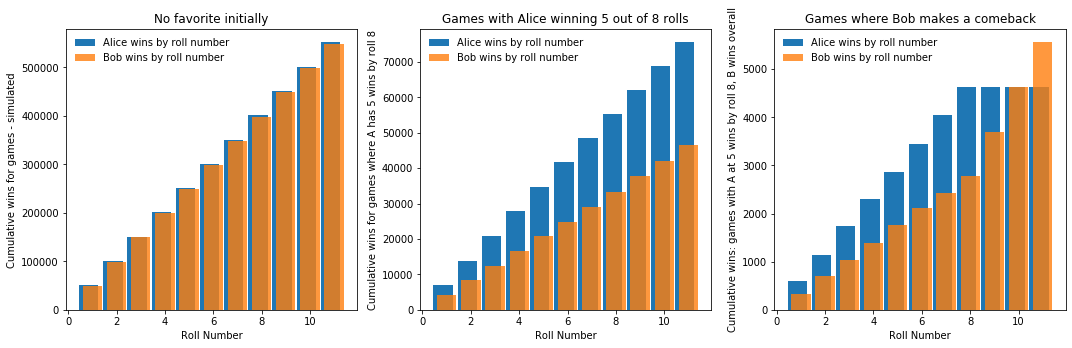

In [3]:
%matplotlib inline

bins = np.arange(1, 12, 1)
fig = plt.figure(figsize=(15,5))

# initially, without any information on the mark, or any observations
# there's no reason Alice or Bob should be favored in our simulation
ax0 = fig.add_subplot(131)
ax0.bar(bins-0.15, np.sum(A_cumulative_wins, axis=1), color='C0', label='Alice wins by roll number')
ax0.bar(bins, np.sum(B_cumulative_wins, axis=1), color='C1', label='Bob wins by roll number', alpha=0.8)
ax0.set_xlabel('Roll Number')
ax0.set_ylabel('Cumulative wins for games - simulated')
ax0.legend(frameon=False)
ax0.set_title('No favorite initially')

# Let's check the simulated games that match our observation of Alice winning 5 rolls by roll #8
ax1 = fig.add_subplot(132)
ax1.bar(bins-0.15, np.sum(A_cumulative_wins[:,ind_A_wins_5_by_8], axis=1), color='C0', label='Alice wins by roll number')
ax1.bar(bins, np.sum(B_cumulative_wins[:,ind_A_wins_5_by_8], axis=1), color='C1', label='Bob wins by roll number', alpha=0.8)
ax1.set_xlabel('Roll Number')
ax1.set_ylabel('Cumulative wins for games where A has 5 wins by roll 8')
ax1.legend(frameon=False)
ax1.set_title('Games with Alice winning 5 out of 8 rolls')

# Let's check the simulated games that Bob wins overall, making a comeback
ax2 = fig.add_subplot(133)
ax2.bar(bins-0.15, np.sum(A_cumulative_wins[:,ind_A_wins_5_by_8][:, ind_B_wins_6_by_11], axis=1), color='C0', label='Alice wins by roll number')
ax2.bar(bins, np.sum(B_cumulative_wins[:,ind_A_wins_5_by_8][:, ind_B_wins_6_by_11], axis=1), color='C1', label='Bob wins by roll number', alpha=0.8)
ax2.set_xlabel('Roll Number')
ax2.set_ylabel('Cumulative wins: games with A at 5 wins by roll 8, B wins overall')
ax2.legend(frameon=False)
ax2.set_title('Games where Bob makes a comeback')

fig.tight_layout()
plt.show()

This frequentist thinking is what casinos use to trap gullible players, who believe they are on a "streak", failing to account for the fact that games are independent, and their ability to win a fair game isn't affected by if they've been winning in the past or not. 